In [1]:
%reload_ext autoreload
%autoreload 2

import json
import os
from glob import glob
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm_notebook as tqdm
import sys
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_total.csv', index_col=0)
df

,loan_finished,folder_name,date_of_birth,loan_date,loan_end_date,adress_index,adress_region,source,childs,education,...,Асимметрия брови,Наклон бровей,Размер рта,Асимметрия наклона глаз,Асимметрия носа,Размер глаз,Оттопыренность ушей,Ширина челюсти,Уголки рта,fraud
0,1,39118-02-016_1c7ea7b8-30fd-11e5-81f6-f01fafe92f9d,1980-02-28,2018-01-11,2018-01-25,461034,Оренбургская обл,Звонок КС,3.0,средне-специальное,...,-8.885945,8.045408,43.290442,7.851208,14.336641,5.694376,11.784860,0.947890,0.851128,False
1,1,04519-20010_dc1fb083-df28-11e7-80e7-000c293676f4,1962-09-08,2019-05-07,2019-05-21,446103,Самарская обл,Банер / Короб на офисе,0.0,среднее-техническое,...,0.096260,2.258178,36.558061,-2.096333,2.598141,6.137502,5.937830,0.860793,-16.326854,False
2,0,18-04-000018_9f0da275-01aa-11e8-80eb-000c293676f4,1977-11-03,2018-01-26,2018-02-09,461040,Оренбургская обл,Другое,0.0,среднее,...,0.953399,12.640578,33.951635,0.000000,-1.439100,5.546837,19.262813,0.862289,-3.179830,True
3,1,19019-04-008_20534214-6d31-11e8-80f4-000c293676f4,1976-03-02,2019-01-22,2019-02-05,461363,Оренбургская обл,Наружная реклама,2.0,средне-специальное,...,1.143808,2.648524,35.565107,-0.591500,-10.608085,5.206807,18.600346,0.925004,1.760799,False
4,0,56318-19-021_25060137-84b6-11e7-80e6-000c293676f4,1977-05-12,2018-05-11,2018-05-25,446116,Самарская обл,Звонок КС,0.0,среднее,...,8.071231,9.122614,32.693283,3.070016,1.190272,5.178545,5.259403,0.904408,-19.859923,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35083,1,54918-20-015_3cb8df22-5c16-11e8-80f3-000c293676f4,1978-09-13,2018-05-20,2018-06-03,446305,Самарская обл,Банер / Короб на офисе,1.0,среднее,...,8.433052,9.387742,29.862630,-3.825446,21.608887,6.518023,18.242348,0.884564,10.732665,False
35084,1,04618-47-014_13b332b6-45e4-11e8-80f1-000c293676f4,1946-01-01,2018-11-24,2018-12-08,446253,Самарская обл,Банер / Короб на офисе,0.0,среднее-техническое,...,0.766980,8.107647,42.222368,0.000000,6.243639,5.269883,11.423910,1.043043,-4.267893,False
35085,1,37018-47-006_65da8683-d9a8-11e8-80ff-000c293676f4,1960-11-28,2018-11-20,2018-12-04,460034,Оренбургская обл,Наружная реклама,0.0,среднее-техническое,...,2.900870,10.141280,37.084780,-2.311605,-4.193323,5.931723,13.523564,0.782567,30.659240,False
35086,1,13818-09-011_b8f7cd5d-1d0d-11e8-80eb-000c293676f4,1978-02-03,2018-03-01,2018-03-08,460508,Оренбургская обл,Интернет,1.0,среднее,...,2.938852,11.811136,40.147345,0.000000,1.080070,4.908314,22.107223,0.937930,18.225075,False


/home/nikolay/anaconda3/envs/merlin/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



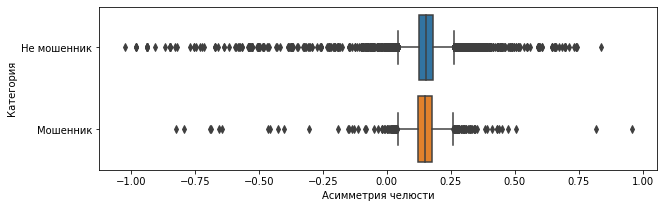

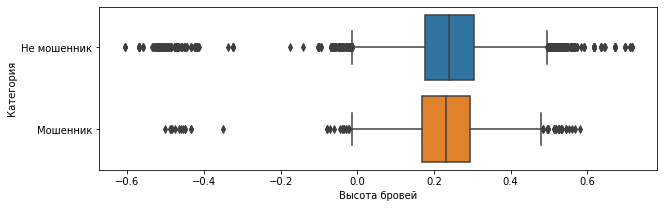

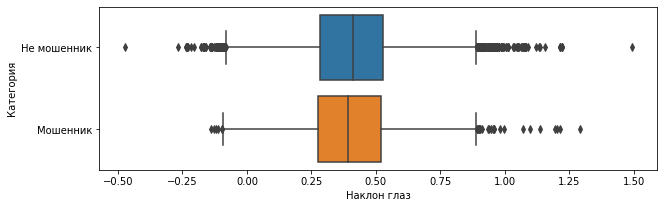

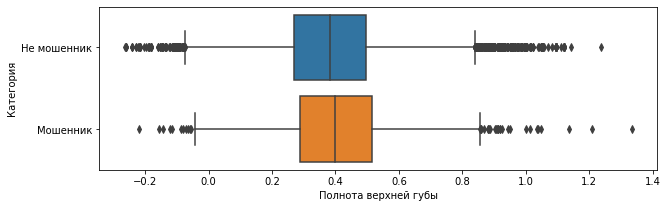

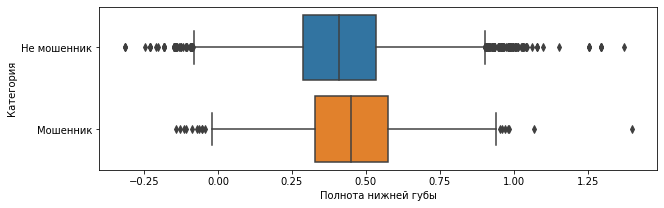

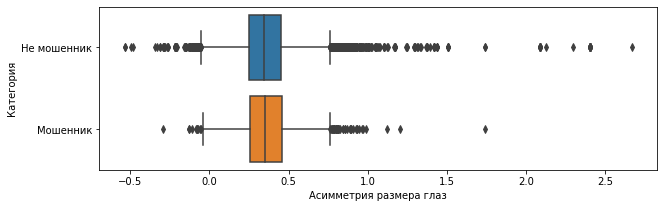

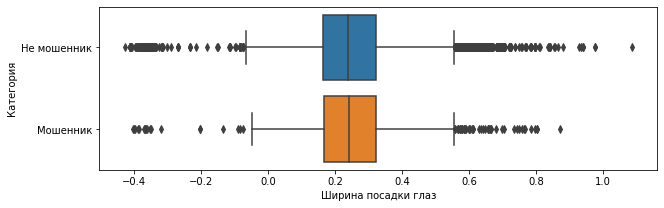

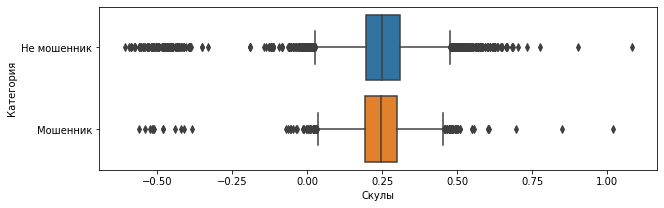

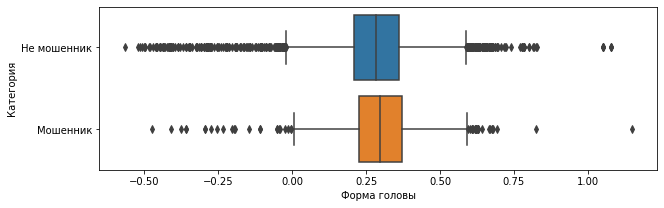

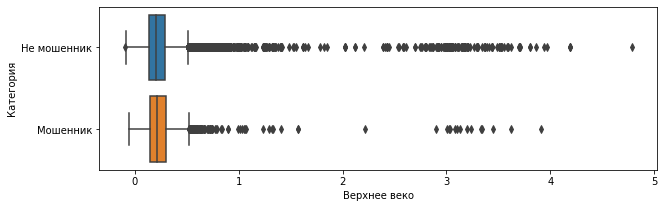

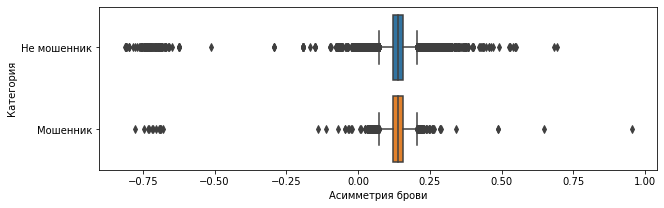

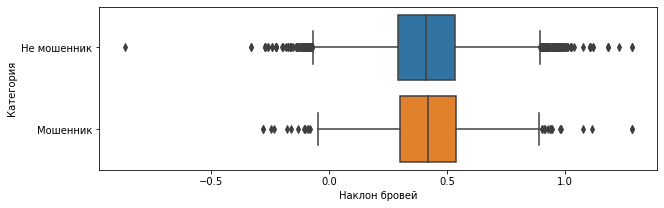

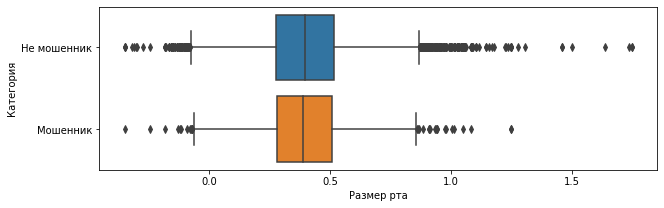

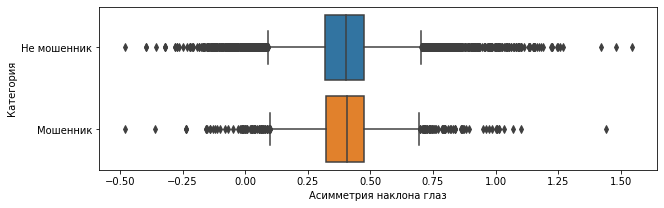

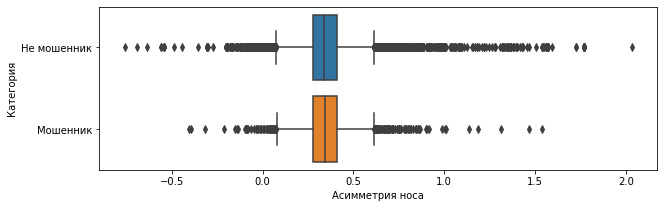

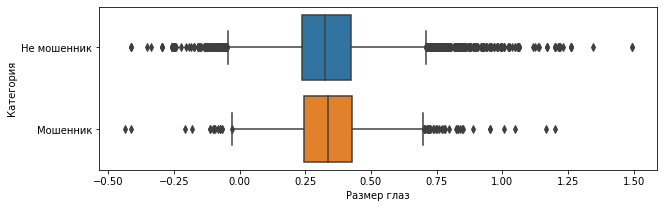

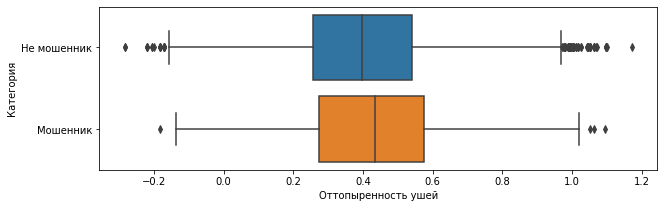

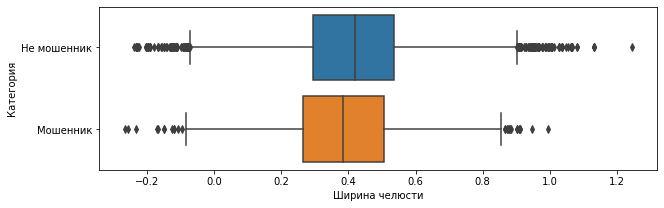

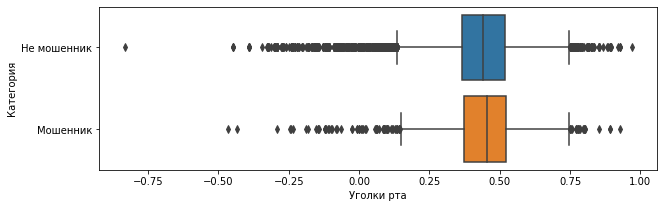

In [3]:
cols = ['Асимметрия челюсти', 'Высота бровей', 'Наклон глаз',
       'Полнота верхней губы', 'Полнота нижней губы',
       'Асимметрия размера глаз', 'Ширина посадки глаз', 'Скулы',
       'Форма головы', 'Верхнее веко', 'Асимметрия брови', 'Наклон бровей',
       'Размер рта', 'Асимметрия наклона глаз', 'Асимметрия носа',
       'Размер глаз', 'Оттопыренность ушей', 'Ширина челюсти', 'Уголки рта',
       ]

for col in tqdm(cols):
    df[col] = (df[col] - df[col].quantile(0.01)) / (df[col].quantile(0.99) - df[col].quantile(0.001))
    
df['Категория'] = df['fraud'].replace({True: 'Мошенник', False: 'Не мошенник'})

for i in cols:
    f, ax = plt.subplots(figsize=(10, 3))
    sns.boxplot(data=df, x=i, y="Категория")
    plt.savefig(f'plots/boxplot/{i}', bbox_inches='tight')
    plt.show()

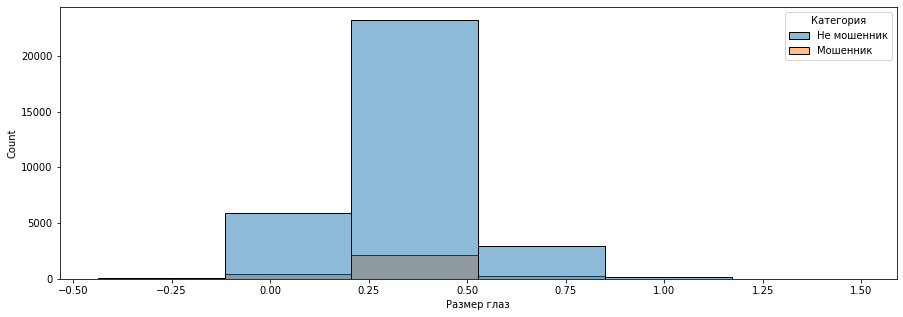

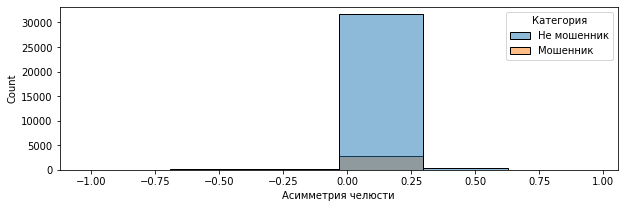

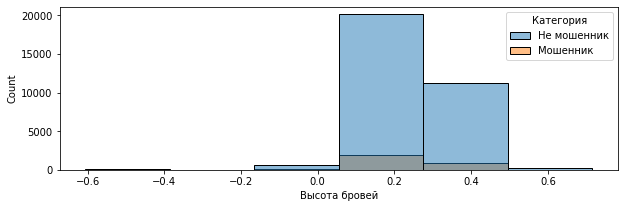

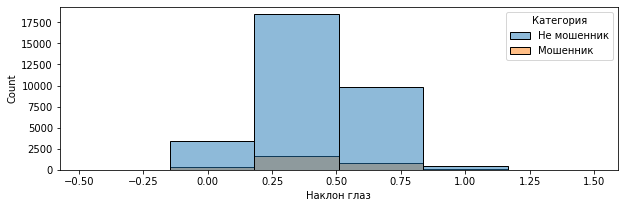

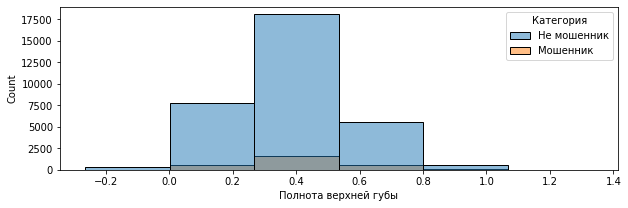

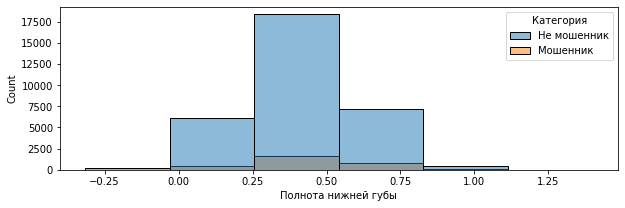

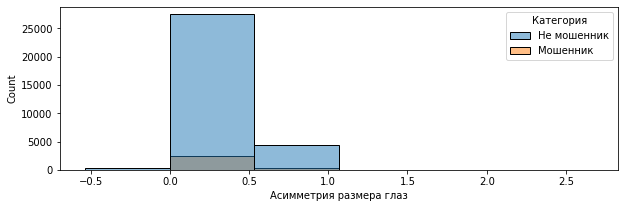

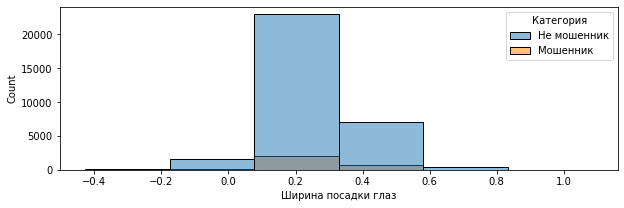

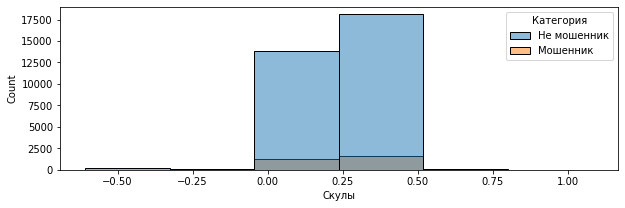

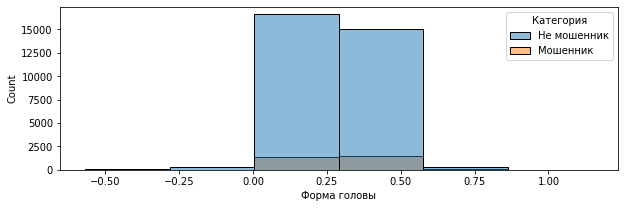

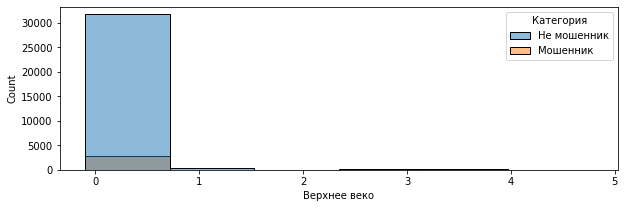

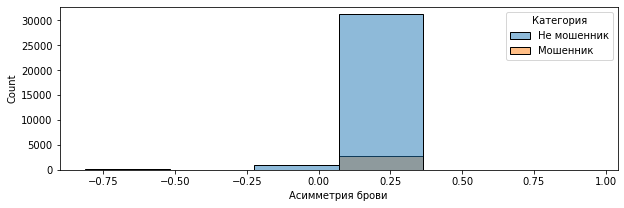

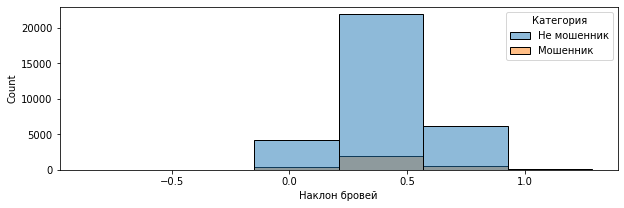

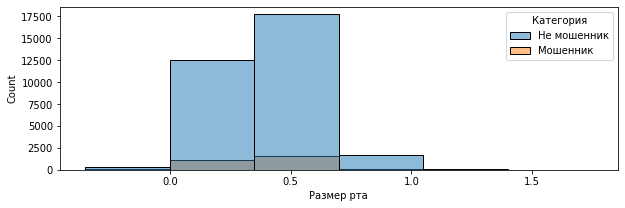

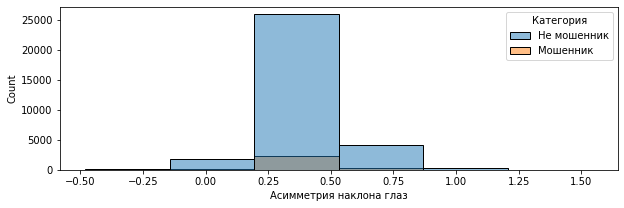

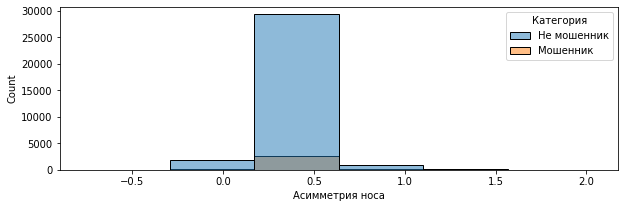

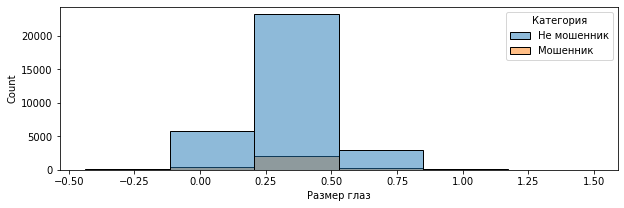

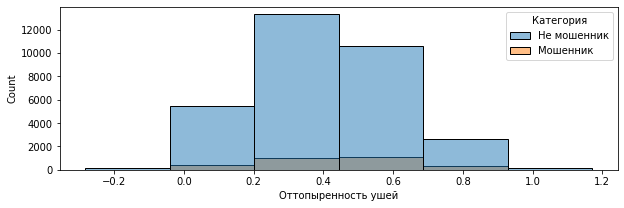

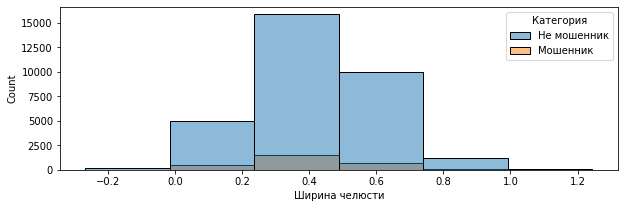

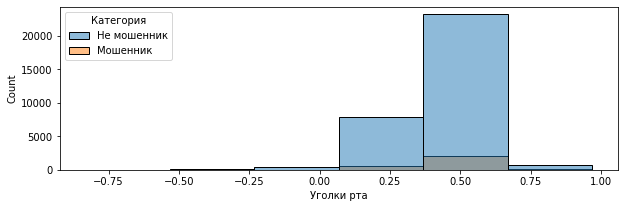

In [5]:
plt.figure(figsize=(15,5))
sns.histplot(df, x='Размер глаз', bins=6, hue='Категория')

for i in cols:
    f, ax = plt.subplots(figsize=(10, 3))
    sns.histplot(df, x=i, bins=6, hue='Категория')
    plt.savefig(f'plots/hists/{i}', bbox_inches='tight')
    plt.show()